# Introduction to Score Analysis

<!-- list some kinds of melodic analyis.
if we have a MusicXLM file x.mxl how do we know it contains anythin melodic? How do we recognize a melody?
how would we implment an analysis given our score struture?
-->

In [1]:
# Setup 

import sys
sys.path.append('/Users/taube/Classes/mus105/Sources')
import score
from theory import TimeLine, TimePoint, Transition, Analysis, Rule, timepoints

# load a few demo scores

laitz = score.import_score("./Laitz_p84D.musicxml")
species1 = score.import_score("./1-001-B_zawang2.musicxml")
species2 = score.import_score("./2-000-A_sz18.musicxml")
bach = score.import_score("./Aus_meines_Herzens_Grunde.xml")
chopin = score.import_score("./chopin_prelude_op28_no20.xml")
print("OK!")

OK!


In order to perform score analysis we need to extract note information from the score and perform analytical operations on it.

<!-- What kinds of analysis can be performed on a melodic score? Given a score object how do we access the melodic data? -->

In [2]:
laitz.metadata

{'work_title': 'Untitled',
 'main_key': Key(1, "Major"),
 'main_meter': Meter(4, 4),
 'voices_melodic': True,
 'voices_static': True,
 'voice_ids': ['P1.1']}

In [3]:
laitz.print()

<Score: "Untitled">
  <Part: P1>
    <Staff: 1>
      <Bar: 1 Treble G-Major 4/4 STANDARD>
        <Voice: 1>
          <Note: G4 1/4>
          <Note: A4 1/4>
          <Note: C5 1/4>
          <Note: B4 1/4>
      <Bar: 2 STANDARD>
        <Voice: 1>
          <Note: A4 1/4>
          <Note: B4 1/4>
          <Note: D5 1/4>
          <Note: C5 1/4>
      <Bar: 3 STANDARD>
        <Voice: 1>
          <Note: B4 1/4>
          <Note: C5 1/4>
          <Note: E5 1/4>
          <Note: D5 1/4>
      <Bar: 4 FINAL_DOUBLE>
        <Voice: 1>
          <Note: C5 1/4>
          <Note: F#4 1/4>
          <Note: G4 1/2>


In [4]:
# A naive implementation of a note accessor for scores

def notes(score, p, s, v):
    data = []
    for b in score.parts[p].staffs[s]:
        data += b.voices[v]
    return data

In [5]:
notes(laitz, 0, 0, 0)

[<Note: G4 1/4>,
 <Note: A4 1/4>,
 <Note: C5 1/4>,
 <Note: B4 1/4>,
 <Note: A4 1/4>,
 <Note: B4 1/4>,
 <Note: D5 1/4>,
 <Note: C5 1/4>,
 <Note: B4 1/4>,
 <Note: C5 1/4>,
 <Note: E5 1/4>,
 <Note: D5 1/4>,
 <Note: C5 1/4>,
 <Note: F#4 1/4>,
 <Note: G4 1/2>]

In [6]:
species1.metadata

{'work_title': 'Untitled',
 'main_key': Key(-3, "Major"),
 'main_meter': Meter(4, 4),
 'voices_melodic': True,
 'voices_static': True,
 'voice_ids': ['P1.1', 'P2.1']}

In [7]:
species1.print()

<Score: "Untitled">
  <Part: P1>
    <Staff: 1>
      <Bar: 1 Treble Ef-Major 4/4 STANDARD>
        <Voice: 1>
          <Note: Eb4 1/1>
      <Bar: 2 STANDARD>
        <Voice: 1>
          <Note: G4 1/1>
      <Bar: 3 STANDARD>
        <Voice: 1>
          <Note: F4 1/1>
      <Bar: 4 STANDARD>
        <Voice: 1>
          <Note: Bb4 1/1>
      <Bar: 5 STANDARD>
        <Voice: 1>
          <Note: C5 1/1>
      <Bar: 6 STANDARD>
        <Voice: 1>
          <Note: Bb4 1/1>
      <Bar: 7 STANDARD>
        <Voice: 1>
          <Note: G4 1/1>
      <Bar: 8 STANDARD>
        <Voice: 1>
          <Note: Ab4 1/1>
      <Bar: 9 STANDARD>
        <Voice: 1>
          <Note: F4 1/1>
      <Bar: 10 FINAL_DOUBLE>
        <Voice: 1>
          <Note: Eb4 1/1>
  <Part: P2>
    <Staff: 1>
      <Bar: 1 Bass Ef-Major 4/4 STANDARD>
        <Voice: 1>
          <Note: Eb3 1/1>
      <Bar: 2 STANDARD>
        <Voice: 1>
          <Note: C3 1/1>
      <Bar: 3 STANDARD>
        <Voice: 1>
          <Note:

Using our notes() accessor we can perform melodic analysis on both voices.

In [32]:
mel1 = notes(species1, 0, 0, 0)
mel1

[<Note: Eb4 1/1>,
 <Note: G4 1/1>,
 <Note: F4 1/1>,
 <Note: Bb4 1/1>,
 <Note: C5 1/1>,
 <Note: Bb4 1/1>,
 <Note: G4 1/1>,
 <Note: Ab4 1/1>,
 <Note: F4 1/1>,
 <Note: Eb4 1/1>]

Simple analysis example: compute the intervals in both melodies

In [33]:
[score.Interval(a.pitch, b.pitch) for a, b in zip(mel1, mel1[1:])]

[Interval("M3"),
 Interval("-M2"),
 Interval("P4"),
 Interval("M2"),
 Interval("-M2"),
 Interval("-m3"),
 Interval("m2"),
 Interval("-m3"),
 Interval("-M2")]

In [36]:
mel2 = notes(species1, 1, 0, 0)
mel2

[<Note: Eb3 1/1>,
 <Note: C3 1/1>,
 <Note: D3 1/1>,
 <Note: D3 1/1>,
 <Note: Eb3 1/1>,
 <Note: D3 1/1>,
 <Note: Eb3 1/1>,
 <Note: C3 1/1>,
 <Note: D3 1/1>,
 <Note: Eb3 1/1>]

In [37]:
[score.Interval(a.pitch, b.pitch) for a, b in zip(mel2, mel2[1:])]

[Interval("-m3"),
 Interval("M2"),
 Interval("P1"),
 Interval("m2"),
 Interval("-m2"),
 Interval("m2"),
 Interval("-m3"),
 Interval("M2"),
 Interval("m2")]

What about a vertical analysis? How do we access simultaneous harmonic data?
<!-- [x for x in zip(notes(species1, 0, 0, 0), notes(species1, 1, 0, 0))] -->

In [10]:
[x for x in zip(notes(species1, 0, 0, 0), notes(species1, 1, 0, 0))]

[(<Note: Eb4 1/1>, <Note: Eb3 1/1>),
 (<Note: G4 1/1>, <Note: C3 1/1>),
 (<Note: F4 1/1>, <Note: D3 1/1>),
 (<Note: Bb4 1/1>, <Note: D3 1/1>),
 (<Note: C5 1/1>, <Note: Eb3 1/1>),
 (<Note: Bb4 1/1>, <Note: D3 1/1>),
 (<Note: G4 1/1>, <Note: Eb3 1/1>),
 (<Note: Ab4 1/1>, <Note: C3 1/1>),
 (<Note: F4 1/1>, <Note: D3 1/1>),
 (<Note: Eb4 1/1>, <Note: Eb3 1/1>)]

Try a second species score

In [11]:
[x for x in zip(notes(species2, 0, 0, 0), notes(species2, 1, 0, 0))]

[(<Note: C4 1/2>, <Note: C3 1/1>),
 (<Note: B3 1/2>, <Note: E3 1/1>),
 (<Note: A3 1/2>, <Note: D3 1/1>),
 (<Note: B3 1/2>, <Note: G3 1/1>),
 (<Note: C4 1/2>, <Note: A3 1/1>),
 (<Note: D4 1/2>, <Note: G3 1/1>),
 (<Note: B3 1/2>, <Note: E3 1/1>),
 (<Note: B3 1/2>, <Note: F3 1/1>),
 (<Note: A3 1/2>, <Note: D3 1/1>),
 (<Note: B3 1/2>, <Note: C3 1/1>)]

Summary: to perform many kinds of musical score analyses we need to take 'vertical slices' of the score at each time point in the score when a new note starts. For some kinds of tonal analyses we will also need a flexible way to move forward and backward in the vertical slices.


## The Theory package

The theory package provides a framework for analyzing symbolic music scores. The main classes are:

* TimePoint - a vertical slice of the score at each time point in the score.
* TimeLine - a series of TimePoints
* Transition - An optional link that allows you to move forwards and backwards in timepoints.
* Analysis - A generic class and API for creating score analyses.
* Rule - A generic class for defining analytical steps in an analysis

### The TimePoint Class

A TimePoint is an analytical structure containing the set of all vertical notes in a score that are sounding when any note begins. 

A TimePoint has two attributes:
* beat - The Ratio start time of the timepoint in its measure.
* nmap - A "notemap" dictionary containing the notes for each part/voice active in this timepoint.

There are two ways to create timepoints: call the  timepoints() function, or create a TimeLine instance.

### timepoints(score, span=False, measures=True, trace=False)

The timepoints() function returns a list of timepoints for the given score. If measure is true then timepoints are organized in sublists representing the measures in the score. If trace is True then timepoints are printed to the terminal as they are parsed from the score.

In [12]:
tps = timepoints(laitz)
tps

[[<TimePoint 0 0x7faf984e7910>,
  <TimePoint 1 0x7faf984e7b10>,
  <TimePoint 2 0x7faf984e78d0>,
  <TimePoint 3 0x7faf984e7950>],
 [<TimePoint 4 0x7faf984e7790>,
  <TimePoint 5 0x7faf984e7110>,
  <TimePoint 6 0x7faf984e7190>,
  <TimePoint 7 0x7faf984e7c90>],
 [<TimePoint 8 0x7faf984e7dd0>,
  <TimePoint 9 0x7faf984e7290>,
  <TimePoint 10 0x7faf984e7410>,
  <TimePoint 11 0x7faf984e75d0>],
 [<TimePoint 12 0x7faf984e7250>,
  <TimePoint 13 0x7faf984e7650>,
  <TimePoint 14 0x7faf984e7d10>]]

In [13]:
tps = timepoints(laitz, measures=False)
tps

[<TimePoint 0 0x7fafa936fc90>,
 <TimePoint 1 0x7fafa936f750>,
 <TimePoint 2 0x7fafa936f9d0>,
 <TimePoint 3 0x7fafa936fed0>,
 <TimePoint 4 0x7fafa936f990>,
 <TimePoint 5 0x7fafa936f2d0>,
 <TimePoint 6 0x7fafa936ff90>,
 <TimePoint 7 0x7fafa936fad0>,
 <TimePoint 8 0x7fafa936f790>,
 <TimePoint 9 0x7fafa936fcd0>,
 <TimePoint 10 0x7fafa936f450>,
 <TimePoint 11 0x7fafa936fa50>,
 <TimePoint 12 0x7fafa936f550>,
 <TimePoint 13 0x7fafa936f110>,
 <TimePoint 14 0x7fafa936f150>]

In [14]:
for tp in tps: print(tp.beat,'  ', tp.nmap)

<Ratio: 0/1 0x7fafa92d0950>    {'P1.1': <Note: G4 1/4>}
<Ratio: 1/4 0x7fafa9360650>    {'P1.1': <Note: A4 1/4>}
<Ratio: 1/2 0x7fafa9360590>    {'P1.1': <Note: C5 1/4>}
<Ratio: 3/4 0x7fafa9360710>    {'P1.1': <Note: B4 1/4>}
<Ratio: 0/1 0x7fafa93601d0>    {'P1.1': <Note: A4 1/4>}
<Ratio: 1/4 0x7fafa93603b0>    {'P1.1': <Note: B4 1/4>}
<Ratio: 1/2 0x7fafa9360170>    {'P1.1': <Note: D5 1/4>}
<Ratio: 3/4 0x7fafa9360110>    {'P1.1': <Note: C5 1/4>}
<Ratio: 0/1 0x7fafa93605f0>    {'P1.1': <Note: B4 1/4>}
<Ratio: 1/4 0x7fafa93600b0>    {'P1.1': <Note: C5 1/4>}
<Ratio: 1/2 0x7fafa9360770>    {'P1.1': <Note: E5 1/4>}
<Ratio: 3/4 0x7fafa93607d0>    {'P1.1': <Note: D5 1/4>}
<Ratio: 0/1 0x7fafa9360890>    {'P1.1': <Note: C5 1/4>}
<Ratio: 1/4 0x7fafa9360830>    {'P1.1': <Note: F#4 1/4>}
<Ratio: 1/2 0x7fafa93608f0>    {'P1.1': <Note: G4 1/2>}


### The TimeLine Class

TimeLine is a wrapper around a list of timepoints. It has three attributes and a `print()` method that displays all the vertical timeline slices in the score.

* self.timepoints - A list of TimePoints
* self.measured - If True the timepoints are organized by measures, e.g. each measure is represented as sublist in the timepoints list. If False then timepoints is a flat list.
* self.spanning - If False a note only appear in the timepoint in which it begins, if True the note will also appear in all the timepoints spanned by its duration.

In [15]:
laitz_tl = TimeLine(laitz)
laitz_tl.print()

0/1 	 P1.1: G4 1/4
1/4 	 P1.1: A4 1/4
1/2 	 P1.1: C5 1/4
3/4 	 P1.1: B4 1/4
----------------------------------------------------------------
0/1 	 P1.1: A4 1/4
1/4 	 P1.1: B4 1/4
1/2 	 P1.1: D5 1/4
3/4 	 P1.1: C5 1/4
----------------------------------------------------------------
0/1 	 P1.1: B4 1/4
1/4 	 P1.1: C5 1/4
1/2 	 P1.1: E5 1/4
3/4 	 P1.1: D5 1/4
----------------------------------------------------------------
0/1 	 P1.1: C5 1/4
1/4 	 P1.1: F#4 1/4
1/2 	 P1.1: G4 1/2
----------------------------------------------------------------


By default, notes only appear their starting TimePoint, regardless of how long their duration is.  For example, in this next listing the whole notes in P2.1 only appear in the downbeat timepoint of each measure even though they sound the entire measure.

In [16]:
species2_tl = TimeLine(species2)
species2_tl.print()

0/1 	 P1.1: C4 1/2, P2.1: C3 1/1
1/2 	 P1.1: B3 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: A3 1/2, P2.1: E3 1/1
1/2 	 P1.1: B3 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: C4 1/2, P2.1: D3 1/1
1/2 	 P1.1: D4 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: B3 1/2, P2.1: G3 1/1
1/2 	 P1.1: B3 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: A3 1/2, P2.1: A3 1/1
1/2 	 P1.1: B3 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: C4 1/2, P2.1: G3 1/1
1/2 	 P1.1: D4 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: C4 1/2, P2.1: E3 1/1
1/2 	 P1.1: B3 1/2, P2.1: ------
----------------------------------------------------------------
0/1 	 P1.1: A3 1/2, P2.1: F3 1/1
1/2 	 P1.1: G3 1/2, P2.1: ------
-----------------

Set the TimeLine() method's span argument to True if you want to include notes in all the timepoints that their durations spans. You can also use the TimePoint's reset() method to remake timepoints in an existing TimeLine.

In [17]:
# Set span to true if you want entries to span all the timepoints
# in which they are still sounding 

species2_tl.reset(species2, span=True)
species2_tl.print()

0/1 	 P1.1: C4 1/2, P2.1: C3 1/1
1/2 	 P1.1: B3 1/2, P2.1: C3 1/1
----------------------------------------------------------------
0/1 	 P1.1: A3 1/2, P2.1: E3 1/1
1/2 	 P1.1: B3 1/2, P2.1: E3 1/1
----------------------------------------------------------------
0/1 	 P1.1: C4 1/2, P2.1: D3 1/1
1/2 	 P1.1: D4 1/2, P2.1: D3 1/1
----------------------------------------------------------------
0/1 	 P1.1: B3 1/2, P2.1: G3 1/1
1/2 	 P1.1: B3 1/2, P2.1: G3 1/1
----------------------------------------------------------------
0/1 	 P1.1: A3 1/2, P2.1: A3 1/1
1/2 	 P1.1: B3 1/2, P2.1: A3 1/1
----------------------------------------------------------------
0/1 	 P1.1: C4 1/2, P2.1: G3 1/1
1/2 	 P1.1: D4 1/2, P2.1: G3 1/1
----------------------------------------------------------------
0/1 	 P1.1: C4 1/2, P2.1: E3 1/1
1/2 	 P1.1: B3 1/2, P2.1: E3 1/1
----------------------------------------------------------------
0/1 	 P1.1: A3 1/2, P2.1: F3 1/1
1/2 	 P1.1: G3 1/2, P2.1: F3 1/1
-----------------

In [18]:
bach_tl = TimeLine(bach)
bach_tl.print()

1/2 	 P1.1: G4 1/4, P1.2: D4 1/4, P1.3: B3 1/4, P1.4: G2 1/4
----------------------------------------------------------------
0/1 	 P1.1: G4 1/2, P1.2: D4 1/4, P1.3: B3 1/4, P1.4: G3 1/4
1/4 	 P1.1: ------, P1.2: E4 1/4, P1.3: C4 1/8, P1.4: E3 1/4
3/8 	 P1.1: ------, P1.2: ------, P1.3: B3 1/8, P1.4: ------
1/2 	 P1.1: D5 1/4, P1.2: D4 1/4, P1.3: A3 1/4, P1.4: F#3 1/4
----------------------------------------------------------------
0/1 	 P1.1: B4 3/8, P1.2: D4 1/2, P1.3: G3 1/4, P1.4: G3 1/4
1/4 	 P1.1: ------, P1.2: ------, P1.3: F#3 1/4, P1.4: D3 1/4
3/8 	 P1.1: A4 1/8, P1.2: ------, P1.3: ------, P1.4: ------
1/2 	 P1.1: G4 1/4, P1.2: B3 1/4, P1.3: G3 1/4, P1.4: E3 1/4
----------------------------------------------------------------
0/1 	 P1.1: G4 3/8, P1.2: E4 1/8, P1.3: C4 1/8, P1.4: C3 1/4
1/8 	 P1.1: ------, P1.2: D4 1/8, P1.3: B3 1/8, P1.4: ------
1/4 	 P1.1: ------, P1.2: E4 1/8, P1.3: C4 1/4, P1.4: B2 1/8
3/8 	 P1.1: A4 1/8, P1.2: F#4 1/8, P1.3: ------, P1.4: A2 1/8
1/2 	 P1.

In [19]:
chopin_tl = TimeLine(chopin)
chopin_tl.print()

0/1 	 P1.1: (G3, C4, Eb4, G4) 1/4, P1.2: R 1/4, P1.5: (C2, C3) 1/4
1/4 	 P1.1: (Ab3, C4, Eb4, Ab4) 1/4, P1.2: R 1/4, P1.5: (F1, F2) 1/4
1/2 	 P1.1: (G3, B3) 1/4, P1.2: (Eb4, G4) 3/16, P1.5: (G1, G2) 1/4
11/16 	 P1.1: ------, P1.2: (D4, F4) 1/16, P1.5: ------
3/4 	 P1.1: (Eb3, G3, C4, Eb4) 1/4, P1.2: R 1/4, P1.5: (C2, G2, C3) 1/4
----------------------------------------------------------------
0/1 	 P1.1: (Eb3, Ab3, C4, Eb4) 1/4, P1.2: R 1/4, P1.5: (Ab1, Ab2) 1/4
1/4 	 P1.1: (F3, Ab3, Db4, F4) 1/4, P1.2: R 1/4, P1.5: (Db1, Db2) 1/4
1/2 	 P1.1: (Db3, Eb3, G3) 1/4, P1.2: (C4, Eb4) 3/16, P1.5: (Eb1, Eb2) 1/4
11/16 	 P1.1: ------, P1.2: (Bb3, Db4) 1/16, P1.5: ------
3/4 	 P1.1: (C3, Eb3, Ab3, C4) 1/4, P1.2: R 1/4, P1.5: (Ab1, Ab2) 1/4
----------------------------------------------------------------
0/1 	 P1.1: (D3, F3, B3, D4) 1/4, P1.2: R 1/4, P1.5: (G1, G2) 1/4
1/4 	 P1.1: (E3, G3, Bb3, C4, E4) 1/4, P1.2: R 1/4, P1.5: (C1, C2) 1/4
1/2 	 P1.1: (Ab3, C4) 1/4, P1.2: G4 3/16, P1.5: (F1, F2) 1

### The Analysis Class

Analysis is an *abstract base class* for implementing score analysis. It declares attributes and methods that can be overridden by subclasses and provides one abstract (virtual) method `setup()` that all subclasses _must_ define. 

Analysis declares three attributes: self.score, self.rules, and self.timepoints.

* self.score: The score being analyzed
* self.rules: A list of rules that run to perform the analysis.
* self.timepoints: A list of timepoints (if your analyses creates them)

Analysis declares three virtual methods: setup(), display(), and cleanup().

* setup(self, args, kwargs): The setup() method must be defined. It is automatically called to initialize your analysis just before it runs. It is passed whatever positional and keyword arguments the user provided to the analyse() function (see below). 
* display(): Can be overridden to display any post-analysis results you want. The default implementation does not display anything.
* cleanup(): Can be overridden to reset instance variables in preparation for another analysis() call. The default implementation does nothing.
* analyze(self, \*args, \*\*kwargs): Called by the user to invoke the analysis. You can pass any set of arguments you want to this function and it will pass them on to your setup() method.

To define your own Analysis you:

1. Define a subclass of Analysis and implement the required setup() method.
2. Define a set of Rules to invoke during analysis.

To perform a specific Analysis you:

1. Create an instance of your analysis class and pass it a score and whatever arguments your init method takes.
2. Call the instance's analyze() method and pass it whatever analysis specific arguments you want.
 

### The Rule Class

An abstract base class for implementing analytical steps and checks.  The constructor for your analysis class should add your rules to its self.rules list.

Rule declares two attributes: self.analysis, self.title.

* self.analysis: a back pointer to the Analysis to which this rule belongs.
* self.title: A string title for the rule.

Rule declares two virtual methods: apply() and display().

* apply(): The code that runs to accomplish whatever your rule wants to do, including
 accessing or setting attributes of the rule's owning analysis (self.analysis).
* display(): Can be overridden to display any post-rule results. The default implementation does not display anything.


## Example 1.

In [21]:
class MyAnalysis (Analysis):
    # Define a rule to run.
    class MyRule1(Rule):
        def __init__(self, analysis):
            # Pass the analysis and title to superclass so their
            # values are stored in self.analysis and self.title.
            super().__init__(analysis, "MyRule1")
        def apply(self):
            # This is the function that perfoms the work
            print(f'Applying Rule 1 in analysis {self.analysis}')
            # If this method is defined it will be called after
            # the rule is run to display something.
        def display(self, index):
            # This rule just prints a message.
            print(f'Displaying Rule 1 results, rule index is {index}')
    # Define another rule to run
    class MyRule2(Rule):
        def __init__(self, analysis):
            super().__init__(analysis, "MyRule2")
        def apply(self):
            print('Applying Rule 2 in analysis {self.analysis}')
        # This rule does not override its display() method
        # def display(self, index):
        #     print(f'Displaying Rule 1 results, rule index is {index}')

    def __init__(self, score):
        # Call the superclass Analysis and give it the score.
        super().__init__(score)
        # Create the rules that the analysis will run.
        self.rules = [self.MyRule1(self), self.MyRule2(self)]
        # Initialize attribitues.
        self.cleanup()
    # Initialize analysis variables to default state
    def cleanup(self):
        # print('in cleanup!')
        self.mymelody = []
        self.myintervals = []
        self.myhistogram = []
    # This setup function just tells you what it received.
    def setup(self, args, kwargs):
        print(f'myanalysis.setup(): args={args} kwargs={kwargs}')
    # The analysis display() is called when everthing is done.
    def display(self):
        print(f'myanalysis.display(): All done, ta-ta! =:)')

In [22]:
# do an analysis 
a = MyAnalysis(laitz)
a.analyze(voiceid=123)

myanalysis.setup(): args=() kwargs={'voiceid': 123}
Applying Rule 1 in analysis <__main__.MyAnalysis object at 0x7fafa975ddd0>
Displaying Rule 1 results, rule index is 0
Applying Rule 2 in analysis {self.analysis}
myanalysis.display(): All done, ta-ta! =:)


In [23]:
# do another analysis on the same score
a.analyze(1,2,3,4,5, foo=True, bar=False)

myanalysis.setup(): args=(1, 2, 3, 4, 5) kwargs={'foo': True, 'bar': False}
Applying Rule 1 in analysis <__main__.MyAnalysis object at 0x7fafa975ddd0>
Displaying Rule 1 results, rule index is 0
Applying Rule 2 in analysis {self.analysis}
myanalysis.display(): All done, ta-ta! =:)


## Example 2.

This analysis performs a note histogram for a given part and voice.

In [24]:
class Histos (Analysis):
    # A Rule that peforms a note histogram for a given part and voice.
    class NoteHist(Rule):
        # The init method passes the analysis and title to the superclass.
        def __init__(self, analysis):
            super().__init__(analysis, "Note Histogram")
        # The apply method performs the analysis.
        def apply(self):
            for tp in self.analysis.timepoints:
                k = tp.nmap[self.analysis.melodic_id]
                # Continue if voice is not in this timepoint or not a pitch
                if not isinstance(k, score.Note): 
                    continue
                # Add or update this pitch in the histogram
                k = k.pitch.string()
                if k in self.analysis.notehist: 
                    self.analysis.notehist[k] += 1
                else:
                    self.analysis.notehist[k] = 1
        
    def __init__(self, score):
        # Call superclass (Analysis) and pass it the score
        super().__init__(score)
        # Create the list of rules. Only one is used.
        self.rules = [self.NoteHist(self)]
        # Set attributes to default state.
        self.cleanup()
    
    # Initialize analysis variables to default state
    def cleanup(self):
        # Cleanup after an analysis.
        #self.notehist = {}
        pass
        
    def setup(self, args, kwargs):
        self.notehist = {}
        # Make sure the part/voice identifier is valid
        if args[0] not in self.score.get_metadata('voice_ids'):
            raise ValueError(f'Part/voice identifier {args[0]} not in score.')
        # Setup the analysis data for the rules to use.
        self.melodic_id = args[0]
        self.timepoints = timepoints(self.score, measures=False)
        
    def display(self):
        print(f'note histogram {self.notehist}')


In [25]:
print(bach)
print(bach.get_metadata('voice_ids'))

<Score: "Aus meines Herzens Grunde" 0x7fafc83dd850>
['P1.1', 'P1.2', 'P1.3', 'P1.4']


note histogram {'D4': 8, 'E4': 10, 'B3': 1, 'F#4': 17, 'G4': 20, 'A4': 5, 'F4': 1}


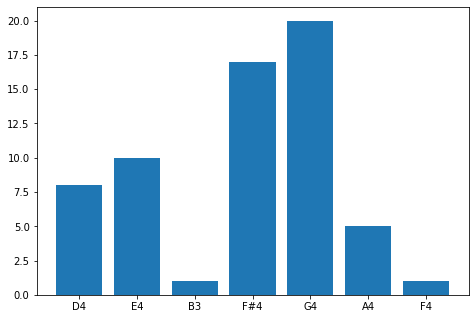

In [26]:
a = Histos(bach)
a.analyze('P1.2')
labels = [k for k in a.notehist]
counts = [a.notehist[k] for k in a.notehist]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,counts)
plt.show()